# Import Libraries and Data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
%matplotlib inline

In [4]:
# Set Path
path = r'C:\Users\bwink\Downloads\Data Analytics A6'

In [5]:
# Import Data
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'crop_yield_no97cocodatetime.csv'))

In [6]:
data = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'WB_employment_data_datetimeattempt.csv'))

In [7]:
data.head()

,Year,Percent Employment in Agriculture
0,1998-01-01,60.68718
1,1999-01-01,60.10669
2,2000-01-01,59.64473
3,2001-01-01,59.08598
4,2002-01-01,58.44382


In [8]:
# Confirming change of "Crop_Year" to "Year"
df.head()

,Crop,Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Wheat,2019-01-01,Rabi,Madhya Pradesh,10216517.0,37507219,1446.7,1.754789e+09,3780111.29,3.519423
1,Wheat,2019-01-01,Rabi,Uttar Pradesh,9852504.0,36209665,814.5,1.692266e+09,3645426.48,3.688533
2,Wheat,2011-01-01,Rabi,Uttar Pradesh,9731150.0,31892480,777.4,1.630162e+09,3211279.50,3.253333
3,Wheat,2010-01-01,Rabi,Uttar Pradesh,9636540.0,30000632,742.6,1.600726e+09,2312769.60,3.077222
4,Wheat,2018-01-01,Rabi,Uttar Pradesh,9855900.0,38039724,792.8,1.598627e+09,3449565.00,3.855600


In [9]:
#merging data set with indicator
df_merged = data.merge(df, on = 'Year', indicator = True)

In [10]:
df_merged.head()

,Year,Percent Employment in Agriculture,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,_merge
0,1998-01-01,60.68718,Wheat,Rabi,Uttar Pradesh,9317904.0,23465191,743.4,920608915.2,2702192.16,2.373735,both
1,1998-01-01,60.68718,Rice,Kharif,Uttar Pradesh,5875153.0,11374070,743.4,580465116.4,1703794.37,1.865060,both
2,1998-01-01,60.68718,Rice,Kharif,Madhya Pradesh,5438800.0,3346300,962.7,537353440.0,1577252.00,0.586786,both
3,1998-01-01,60.68718,Soyabean,Kharif,Madhya Pradesh,4588600.0,4639100,962.7,453353680.0,1330694.00,0.825962,both
4,1998-01-01,60.68718,Wheat,Rabi,Madhya Pradesh,4577900.0,8179600,962.7,452296520.0,1327591.00,1.618983,both


In [11]:
df_merged.tail()

,Year,Percent Employment in Agriculture,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,_merge
19106,2020-01-01,44.30447,Moong(Green Gram),Kharif,Uttarakhand,9.0,6,1313.947826,1742.49,3.33,0.856667,both
19107,2020-01-01,44.30447,Moong(Green Gram),Summer,Uttarakhand,8.0,5,1313.947826,1548.88,2.96,0.785000,both
19108,2020-01-01,44.30447,Sunflower,Kharif,Uttarakhand,3.0,2,1313.947826,580.83,1.11,0.750000,both
19109,2020-01-01,44.30447,Sunflower,Summer,Uttarakhand,3.0,2,1313.947826,580.83,1.11,0.670000,both
19110,2020-01-01,44.30447,Tobacco,Whole Year,Uttarakhand,3.0,6,1313.947826,580.83,1.11,2.000000,both


In [12]:
df_merged.drop(columns = ['_merge'])

,Year,Percent Employment in Agriculture,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1998-01-01,60.68718,Wheat,Rabi,Uttar Pradesh,9317904.0,23465191,743.400000,9.206089e+08,2702192.16,2.373735
1,1998-01-01,60.68718,Rice,Kharif,Uttar Pradesh,5875153.0,11374070,743.400000,5.804651e+08,1703794.37,1.865060
2,1998-01-01,60.68718,Rice,Kharif,Madhya Pradesh,5438800.0,3346300,962.700000,5.373534e+08,1577252.00,0.586786
3,1998-01-01,60.68718,Soyabean,Kharif,Madhya Pradesh,4588600.0,4639100,962.700000,4.533537e+08,1330694.00,0.825962
4,1998-01-01,60.68718,Wheat,Rabi,Madhya Pradesh,4577900.0,8179600,962.700000,4.522965e+08,1327591.00,1.618983
...,...,...,...,...,...,...,...,...,...,...,...
19106,2020-01-01,44.30447,Moong(Green Gram),Kharif,Uttarakhand,9.0,6,1313.947826,1.742490e+03,3.33,0.856667
19107,2020-01-01,44.30447,Moong(Green Gram),Summer,Uttarakhand,8.0,5,1313.947826,1.548880e+03,2.96,0.785000
19108,2020-01-01,44.30447,Sunflower,Kharif,Uttarakhand,3.0,2,1313.947826,5.808300e+02,1.11,0.750000
19109,2020-01-01,44.30447,Sunflower,Summer,Uttarakhand,3.0,2,1313.947826,5.808300e+02,1.11,0.670000


In [17]:
data_sub = data

In [18]:
from datetime import datetime

data_sub['Crop_Year'] = pd.to_datetime(data_sub['Year']) 
data_sub = data_sub.set_index('Crop_Year') 
data_sub.drop(['Year'], axis=1, inplace=True)
data_sub.head()


,Percent Employment in Agriculture
Crop_Year,
1998-01-01,60.68718
1999-01-01,60.10669
2000-01-01,59.64473
2001-01-01,59.08598
2002-01-01,58.44382


In [20]:
# Time regression for Production
#drop columns for analysis
data_prod_graph = data_sub.drop(columns = ['Percent Employment in Agriculture', 'Crop', 'Season', 'State', 'Area', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', '_merge'])

In [21]:
data_prod_graph.head()

,Production
Crop_Year,
1998-01-01,23465191
1998-01-01,11374070
1998-01-01,3346300
1998-01-01,4639100
1998-01-01,8179600


# Line Graph

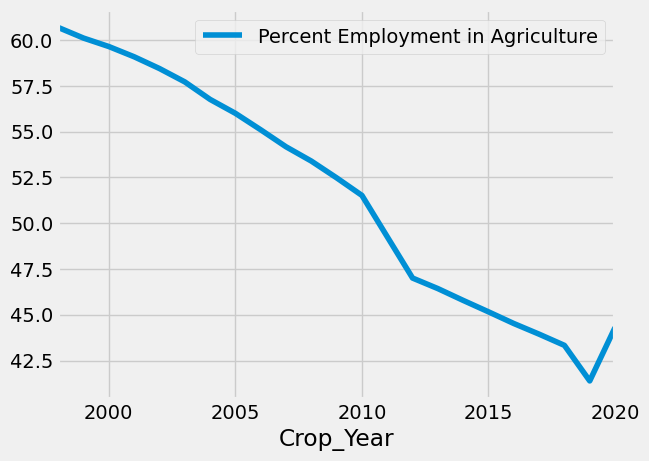

In [19]:
# Imputed date-time format does not work
# create line graph
ax = data_sub.plot.line()

# Decomposition

In [18]:
data_sub.isnull().sum() 

Percent Employment in Agriculture    0
dtype: int64

In [17]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

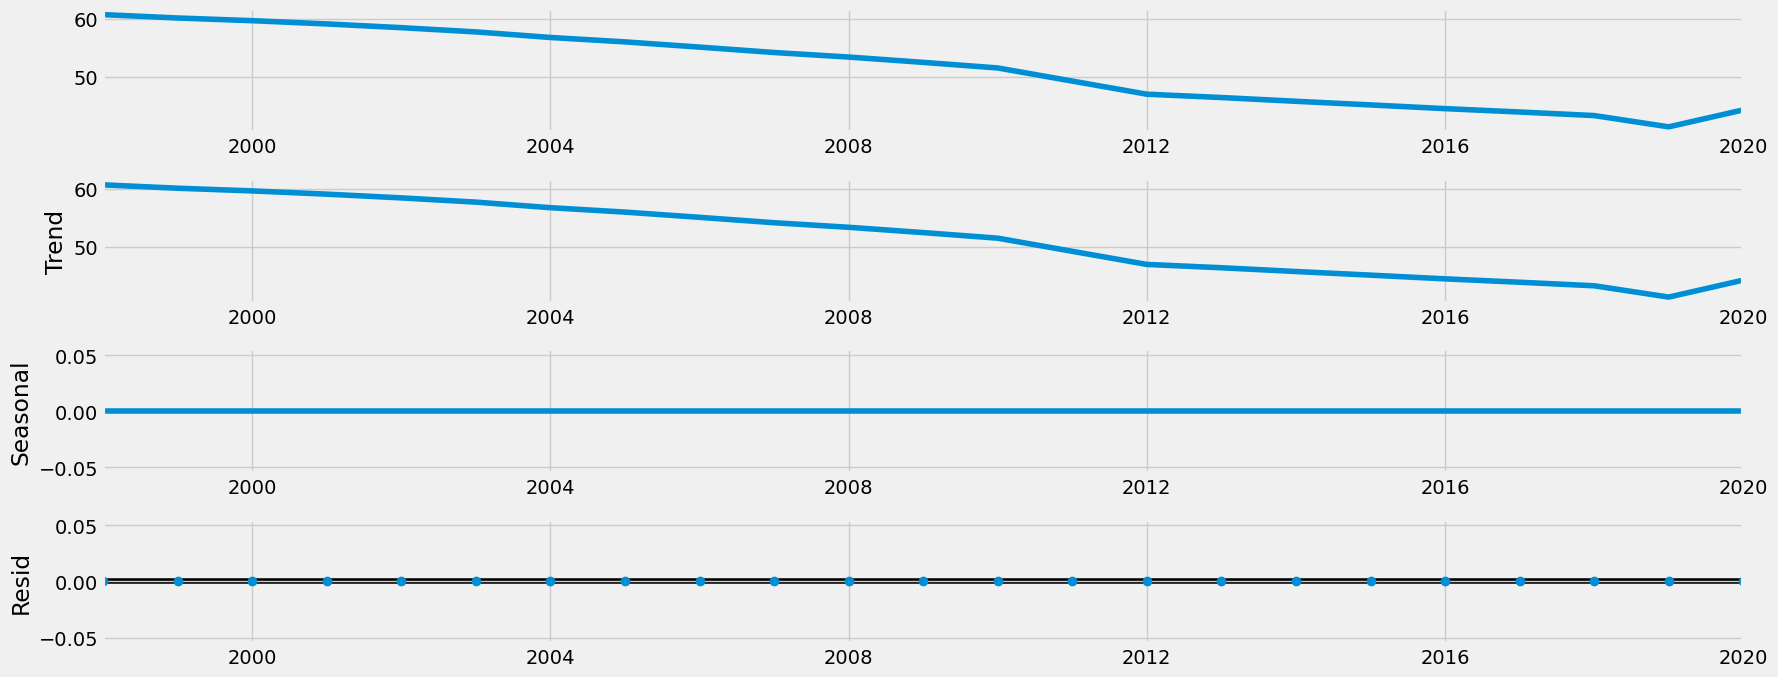

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

## We can see a general downward trend, with zero seasonality and what looks to be zero noise

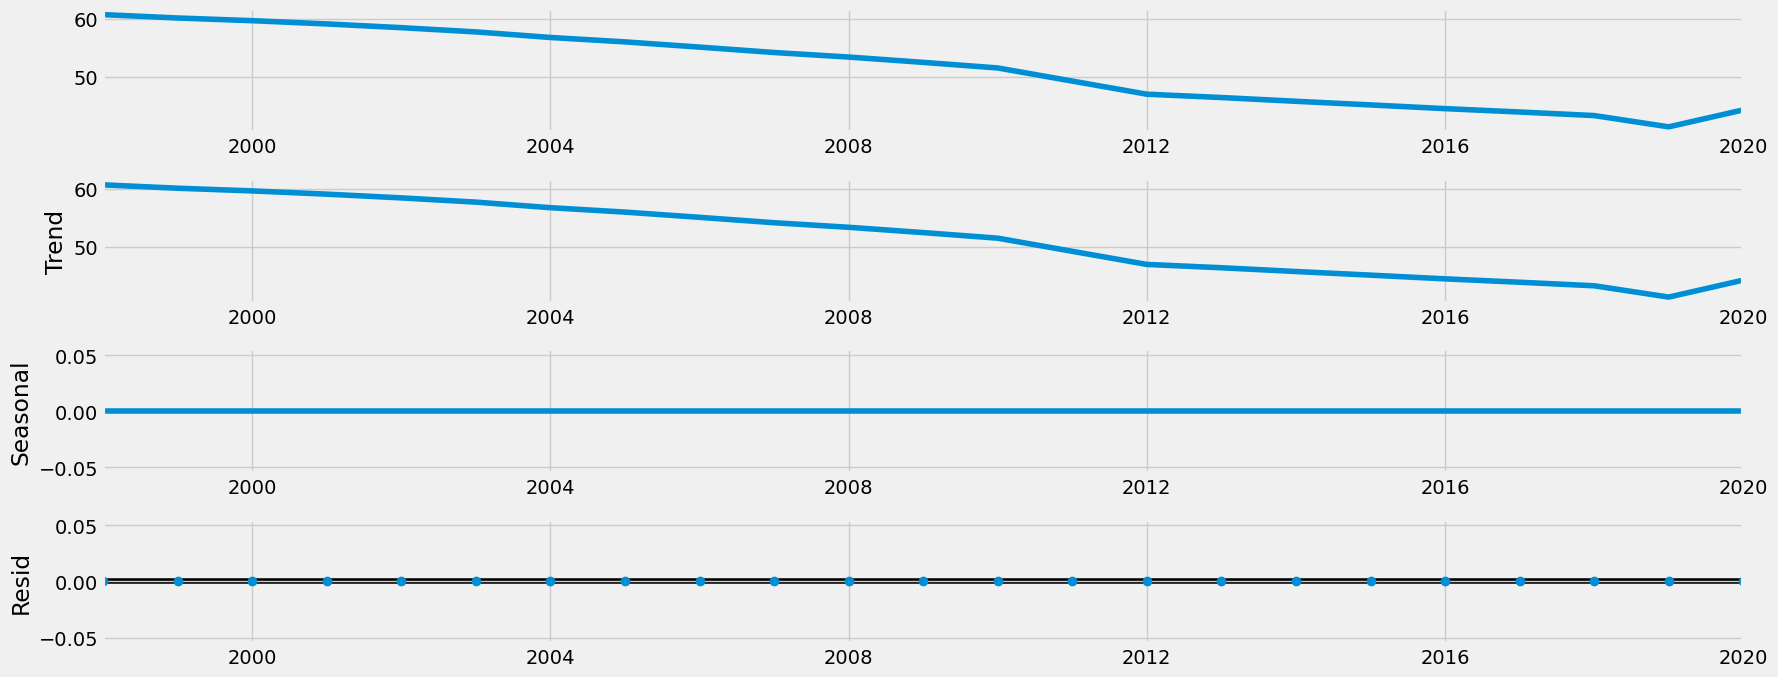

In [21]:
# Non-Linear Decomposition
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')
decomposition.plot()
plt.show()

# Testing for Stationarity

In [22]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Percent Employment in Agriculture'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.085494e+00
p-value                        1.066886e-07
Number of Lags Used            9.000000e+00
Number of Observations Used    1.300000e+01
Critical Value (1%)           -4.068854e+00
Critical Value (5%)           -3.127149e+00
Critical Value (10%)          -2.701730e+00
dtype: float64


# Null Hypothesis: Non-stationary
# p-value < 0.05
# all critical values are greater than test statistic
# We can reject the null hypothesis!
# The data is stationary

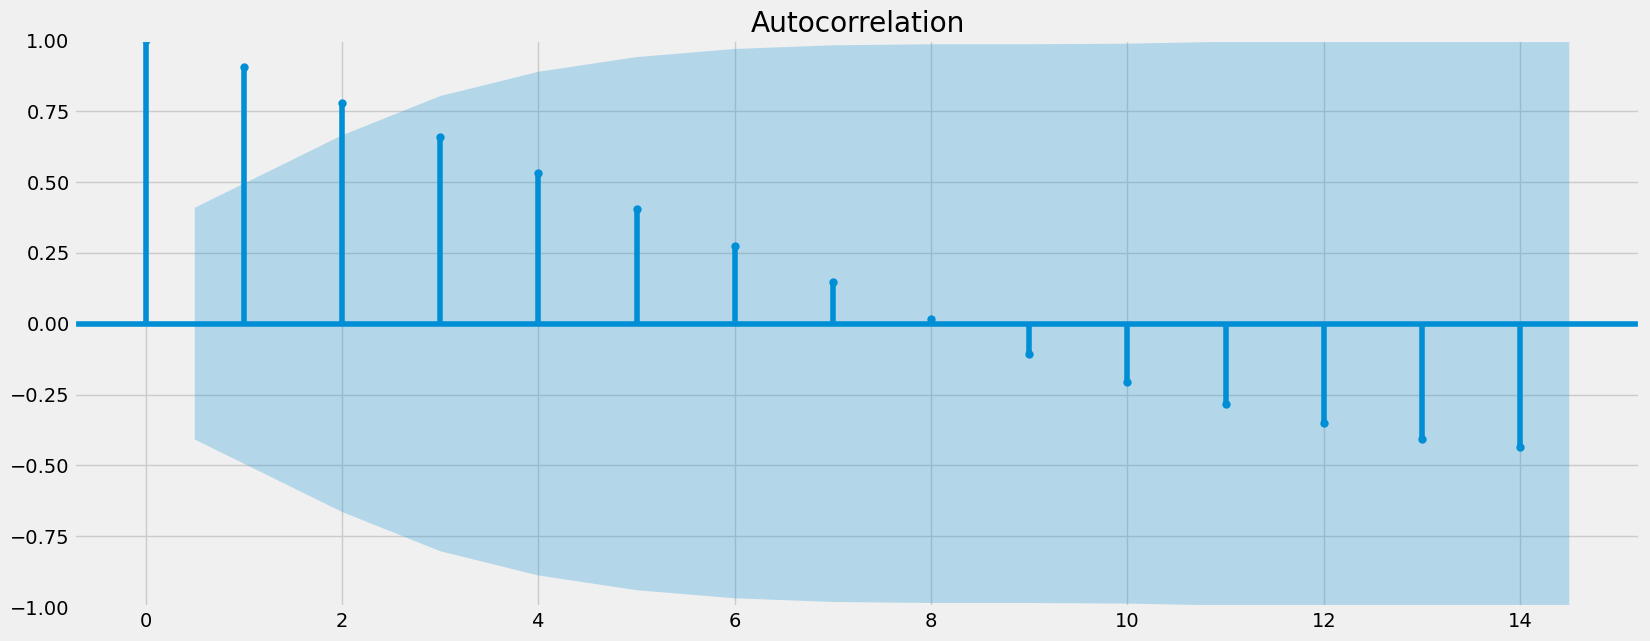

In [24]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

In [ ]:
# There are only 3 autocorrelated terms, indicating weak stationarity, but well under the threshold requiring differencing